Performance Metrics:
Median Blur -> PSNR: 18.34, SSIM: 0.3922
Gaussian Blur -> PSNR: 20.48, SSIM: 0.6656
Non-Local Means Denoising -> PSNR: 19.73, SSIM: 0.4681


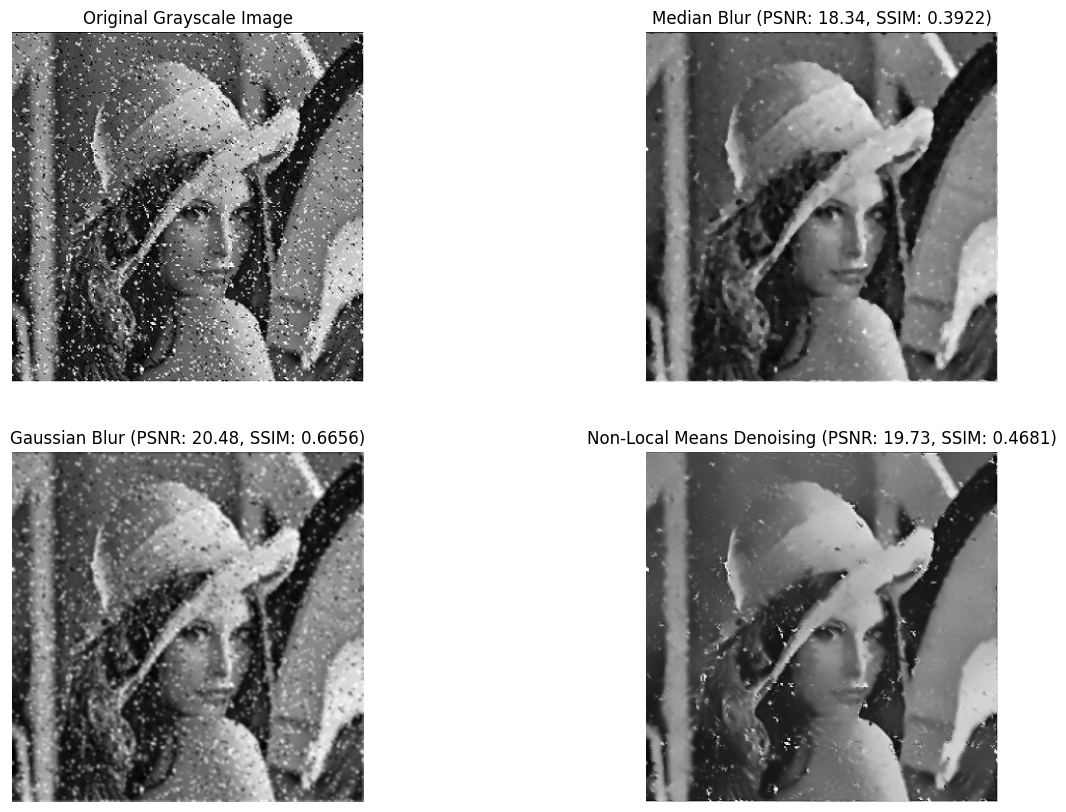

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Load the image correctly
image_path = "Images/lol12.png"  # Ensure the file exists
image = cv2.imread(image_path)

# Check if image is loaded successfully
if image is None:
    print("Error: Image could not be loaded. Check the file path!")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Median Blur (removes salt-and-pepper noise)
    median_blur = cv2.medianBlur(gray, 5)

    # Apply Gaussian Blur (smoothens image)
    gaussian_blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Non-Local Means Denoising (for better noise reduction)
    nlm_denoised = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)

    # Compute PSNR and SSIM for each method
    psnr_median = psnr(gray, median_blur)
    ssim_median = ssim(gray, median_blur)

    psnr_gaussian = psnr(gray, gaussian_blur)
    ssim_gaussian = ssim(gray, gaussian_blur)

    psnr_nlm = psnr(gray, nlm_denoised)
    ssim_nlm = ssim(gray, nlm_denoised)

    # Print the results
    print("Performance Metrics:")
    print(f"Median Blur -> PSNR: {psnr_median:.2f}, SSIM: {ssim_median:.4f}")
    print(f"Gaussian Blur -> PSNR: {psnr_gaussian:.2f}, SSIM: {ssim_gaussian:.4f}")
    print(f"Non-Local Means Denoising -> PSNR: {psnr_nlm:.2f}, SSIM: {ssim_nlm:.4f}")

    # Display results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(median_blur, cmap='gray')
    plt.title(f"Median Blur (PSNR: {psnr_median:.2f}, SSIM: {ssim_median:.4f})")
    plt.axis("off")

    plt.subplot(2, 2, 3)
    plt.imshow(gaussian_blur, cmap='gray')
    plt.title(f"Gaussian Blur (PSNR: {psnr_gaussian:.2f}, SSIM: {ssim_gaussian:.4f})")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.imshow(nlm_denoised, cmap='gray')
    plt.title(f"Non-Local Means Denoising (PSNR: {psnr_nlm:.2f}, SSIM: {ssim_nlm:.4f})")
    plt.axis("off")

    plt.show()
